# CCA

### CCA Manual approach

In [ ]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import cv2


# Loading the first image and stacking the bands

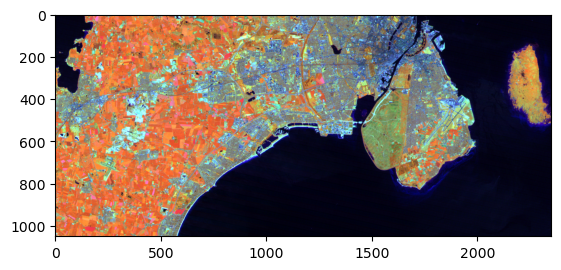

(1050, 2350, 6)
(2467500, 6)
   Red_m  Blue_m  Green_m  BandA_m  BandB_m  BandC_m
0      8       5       23       42       36       22
1      8       8       23       42       43       22
2      8      10       23       42       43       17
3      8      11       23       42       36       17
4      9      11       23       42       36       17


In [30]:
# access folder where image is located C:\Users\franc\Desktop\Corsi\Mapping\KN\Lec2
in_dir = 'C:\\Users\\franc\\Desktop\\Corsi\\Mapping\\KN\\Lec5\\'

dataset = gdal.Open(in_dir + 'udsnit_1986_06_27_band453.tiff')

bands = []

band4 = dataset.GetRasterBand(1) # Red channel
band5 = dataset.GetRasterBand(2) # Green channel
band3 = dataset.GetRasterBand(3) # Blue channel

b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()
b3 = band3.ReadAsArray()

# stack the bands as columns in a numpy array

# Loop through each band and read it into a numpy array
for band_number in range(1,4):
    band = dataset.GetRasterBand(band_number)
    band_array = band.ReadAsArray()
    bands.append(band_array)

# ------------ plot the image -----------------

from skimage import exposure
image = np.stack(bands, axis=2)

p2, p98 = np.percentile(image, (2,98))
image1_RGB = exposure.rescale_intensity(image, in_range=(p2, p98))

plt.imshow(image1_RGB)
plt.show()

# ---------------------------------------------

# Open other 3 bands

in_dir = 'C:\\Users\\franc\\Desktop\\Corsi\\Mapping\\KN\\Lec5\\'
dataset = gdal.Open(in_dir + 'udsnit_1986_06_27_farve.tiff')

# stack the bands as columns in a numpy array

# Loop through each band and read it into a numpy array
for band_number in range(1, 4):
    band = dataset.GetRasterBand(band_number)
    band_array = band.ReadAsArray()
    bands.append(band_array)


# Stack the bands together into a 3D array
stacked_bands = np.stack(bands, axis=2)
image1 = stacked_bands
print(image1.shape)

X = image1.reshape((-1, image1.shape[2]))

print(X.shape)

# Create a dataframe from the stacked numpy array
df_X = pd.DataFrame(X, columns=['Red_m', 'Blue_m', 'Green_m', 'BandA_m', 'BandB_m', 'BandC_m'])

print(df_X.head())

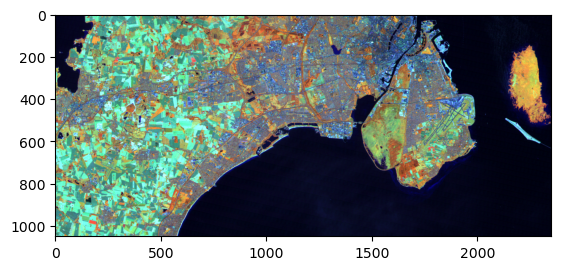

(1050, 2350, 6)
(2467500, 6)
   Red_s  Blue_s  Green_s  BandA_s  BandB_s  BandC_s
0      8      10       30       37       53       45
1      8       8       30       37       53       42
2      6       4       30       37       46       42
3      6       6       25       30       46       45
4      8       6       30       37       53       38


In [29]:
# access folder where image is located C:\Users\franc\Desktop\Corsi\Mapping\KN\Lec2
in_dir = 'C:\\Users\\franc\\Desktop\\Corsi\\Mapping\\KN\\Lec5\\'

dataset = gdal.Open(in_dir + 'udsnit_2005_08_18_band453.tiff')

bands = []

band4 = dataset.GetRasterBand(1) # Red channel
band5 = dataset.GetRasterBand(2) # Green channel
band3 = dataset.GetRasterBand(3) # Blue channel

b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()
b3 = band3.ReadAsArray()

# stack the bands as columns in a numpy array

# Loop through each band and read it into a numpy array
for band_number in range(1,4):
    band = dataset.GetRasterBand(band_number)
    band_array = band.ReadAsArray()
    bands.append(band_array)

# ------------ plot the image -----------------

from skimage import exposure
image = np.stack(bands, axis=2)

p2, p98 = np.percentile(image, (2,98))
image2_RGB = exposure.rescale_intensity(image, in_range=(p2, p98))

plt.imshow(image2_RGB)
plt.show()

# ---------------------------------------------

# Open other 3 bands

in_dir = 'C:\\Users\\franc\\Desktop\\Corsi\\Mapping\\KN\\Lec5\\'
dataset = gdal.Open(in_dir + 'udsnit_2005_08_18_farve.tiff')

# stack the bands as columns in a numpy array

# Loop through each band and read it into a numpy array
for band_number in range(1, 4):
    band = dataset.GetRasterBand(band_number)
    band_array = band.ReadAsArray()
    bands.append(band_array)


# Stack the bands together into a 3D array
stacked_bands = np.stack(bands, axis=2)
image2 = stacked_bands
print(image2.shape)

Y = image2.reshape((-1, image2.shape[2]))

print(Y.shape)

# Create a dataframe from the stacked numpy array
df_Y = pd.DataFrame(Y, columns=['Red_s', 'Blue_s', 'Green_s', 'BandA_s', 'BandB_s', 'BandC_s'])

print(df_Y.head())

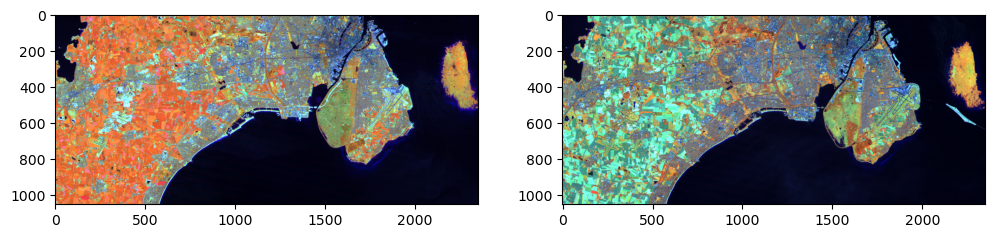

In [31]:
# Plot the two images alongside each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.imshow(image1_RGB)
ax2.imshow(image2_RGB)
plt.show()


In [32]:

# Standardize the data

X_standardized = (df_X - np.mean(X, axis=0)) / np.std(df_X, axis=0)
Y_standardized = (df_Y - np.mean(Y, axis=0)) / np.std(df_Y, axis=0)

# Calculate the covariance matrix
cov_XX = np.cov(X_standardized.T)
cov_YY = np.cov(Y_standardized.T)

Xz = df_X - df_X.mean(axis=0)
Yz = df_Y - df_Y.mean(axis=0)

cov_XY = Xz.T.dot(Yz).div(len(X)).div(Yz.std(ddof=0)).div(Xz.std(ddof=0),axis=0)

# cov_XY = X_standardized.T.dot(Y) / len(X_standardized) / Y_standardized.std(ddof=0) / X_standardized.std(ddof=0)

print(cov_XX)
print(cov_YY)
print('')
print(cov_XY)


#print determinant

result = np.dot(np.dot(np.linalg.inv(cov_XX), cov_XY), np.linalg.inv(cov_YY))


[[1.00000041 0.78049784 0.40487528 0.51978697 0.61479496 0.30734057]
 [0.78049784 1.00000041 0.78394823 0.83919476 0.8584466  0.68635033]
 [0.40487528 0.78394823 1.00000041 0.9843159  0.93695494 0.94816131]
 [0.51978697 0.83919476 0.9843159  1.00000041 0.97142398 0.92487293]
 [0.61479496 0.8584466  0.93695494 0.97142398 1.00000041 0.8879833 ]
 [0.30734057 0.68635033 0.94816131 0.92487293 0.8879833  1.00000041]]
[[1.00000041 0.79879058 0.57883716 0.65591642 0.69667259 0.50252677]
 [0.79879058 1.00000041 0.86765568 0.88981112 0.86749884 0.72612636]
 [0.57883716 0.86765568 1.00000041 0.98293311 0.94796654 0.92832065]
 [0.65591642 0.88981112 0.98293311 1.00000041 0.96748981 0.91304868]
 [0.69667259 0.86749884 0.94796654 0.96748981 1.00000041 0.92306077]
 [0.50252677 0.72612636 0.92832065 0.91304868 0.92306077 1.00000041]]

            Red_s    Blue_s   Green_s   BandA_s   BandB_s   BandC_s
Red_m    0.810610  0.892916  0.731797  0.783203  0.756439  0.579437
Blue_m   0.837359  0.787693  0.68

In [33]:
# Eigenvector decomposition to obtain the correlation and a

eig_vals, eig_vecs = np.linalg.eig(result)

rho = np.sqrt(eig_vals)

print(rho)

[3.16987077+0.j         2.81214468+0.j         1.10838746+0.j
 0.68923036+0.66679933j 0.68923036-0.66679933j 0.64930164+0.j        ]
